# 8.4a
### Introduction
A) Motion of a nonlinear pendulum. $\ell = 10$ cm, $\theta = 179^\circ$. Plot $\theta$ vs $t$

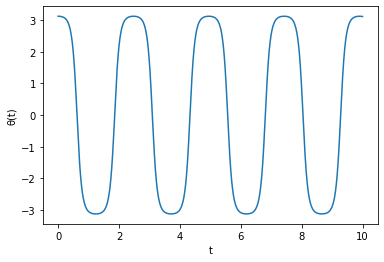

In [1]:
from math import sin,pi
from numpy import arange,array
from pylab import plot,xlabel,ylabel,show

def f(r,t):
    theta = r[0]
    omega = r[1]
    dtheta = omega
    domega = -(g/l)*sin(theta)
    return array([dtheta,domega],float)

a = 0.0
b = 10.0
N = 10000
h = (b-a)/N
g = 9.81
l = 0.1

tpoints = arange(a,b,h)
thetapoints = []
theta = 179*pi/180

r = array([theta,0])

for t in tpoints:
    thetapoints.append(r[0])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

plot(tpoints,thetapoints)
xlabel("t")
ylabel("θ(t)")
show()

### Conclusion
I hope this is correct. I messed up in the for loop at first. I had thetapoints.append(theta) instead and it was just a straight line. 

# 8.5
### Introduction
Now make it have an oscillating force to gice it an acceleration.
$$ {d^2 \theta \over dt^2} = -{g\over \ell}\sin{\theta}+C\cos{\theta}\sin{\Omega t}$$

A) Plot with RK4 for $\theta$ with $\ell = 10$cm $C=2 s^{-2}$ and $\Omega = 5s^{-1}$ starts at $\theta = 0$ and at rest.

B) Change $\Omega$ until it resonates. 

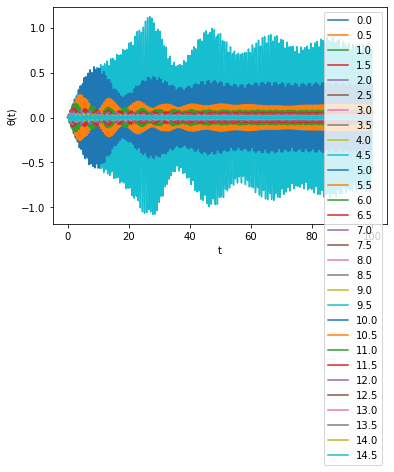

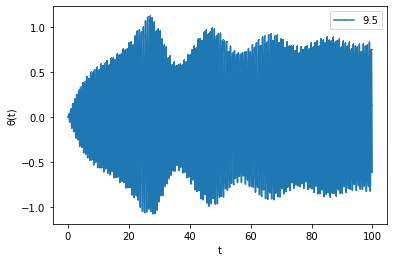

In [2]:
from math import sin,pi,cos
from numpy import arange,array
from pylab import plot,xlabel,ylabel,show,legend

def f(r,t):
    theta = r[0]
    omega = r[1]
    dtheta = omega
    domega = -(g/l)*sin(theta)+C*cos(theta)*sin(Ω*t)
    return array([dtheta,domega],float)

a = 0.0
b = 100.0
N = 1000
h = (b-a)/N
g = 9.81
l = 0.1
C = 2
omegas = arange(0,15,.5)
for Ω in omegas:

    tpoints = arange(a,b,h)
    thetapoints = []

    r = array([0,0],float)

    for t in tpoints:
        thetapoints.append(r[0])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6

    plot(tpoints,thetapoints,label=f'{Ω}')
xlabel("t")
ylabel("θ(t)")
legend()
show()

Ω = 9.5
tpoints = arange(a,b,h)
thetapoints = []

r = array([0,0],float)

for t in tpoints:
    thetapoints.append(r[0])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

plot(tpoints,thetapoints,marker=',',label=f'{Ω}')
xlabel("t")
ylabel("θ(t)")
legend()
show()

### Conclusion
I found it resonated the most when $\Omega = 9.5$. To find it, I plotted a variety of values for $\Omega$ and looked at the highest. I thought it was a pretty graph.

# Exercise 8.7
### Introduction
Make a plot of the trajectory of a ball thrown taking into account air resistence. 

A) $${d^2x \over dt^2} = - {\pi R^2 \rho C \over 2m} v_x \sqrt{v_x^2 + v_y^2}$$
$${d^2y \over dt^2} = - {\pi R^2 \rho C \over 2m} v_y \sqrt{v_x^2 + v_y^2} - g$$

B) 4th Order RK to find and plot trajectory. mass of 1kg, radius of 8 cm, shot at 30 degrees, velocity of 100 m/s, density of air is 1.22 kg/m^3, C = 0.47

C) How does mass change it?

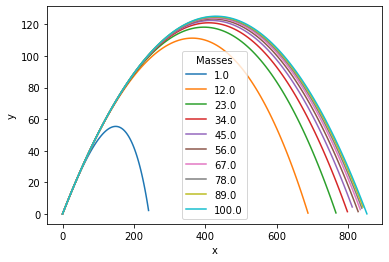

In [3]:
from numpy import arange, sin,cos, sqrt,pi,linspace
from pylab import plot,xlabel,ylabel,show,legend

def f(r,t):
    x = r[0][0]
    vx = r[0][1]
    y = r[1][0]
    vy = r[1][1]
    dx = vx
    dy = vy
    dvx = -pi*R*R*ρ*C/2/m*vx*sqrt(vx*vx+vy*vy)
    dvy = -pi*R*R*ρ*C/2/m*vy*sqrt(vx*vx+vy*vy)-g
    return array([[dx,dvx],[dy,dvy]])

a = 0.0
b = 1000
N = 10000
h = (b-a)/N
masses = linspace(1,100,10)
R = 8e-2
ρ=1.22
C = 0.47

for m in masses:
    tpoints = []
    xpoints = []
    ypoints = []
    x = 0.0
    y = 0.0
    v = 100
    θ = 30*pi/180
    vx = v*cos(θ)
    vy = v*sin(θ)
    r = array([[x,vx],[y,vy]])
    t = 0
    while r[1][0] >= 0:
        xpoints.append(r[0][0])
        ypoints.append(r[1][0])
        tpoints.append(t+h)
        t = tpoints[-1]
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6

    plot(xpoints,ypoints,label=m)
xlabel("x")
ylabel("y")
legend(title="Masses")
show()

### Conclusion 
The mass makes the effect of drag have less of an effect. However, the higher the mass, the less of the change in the effect.
I messed up my indexing at first, but I enjoyed this a lot.

# 8.10 In Class
### Introduction
Comet orbiting. $$ {d^2 r \over dt^2} = -GM{x \over r^3}$$ where $r = \sqrt{x^2 + y^2}$

B) Have a fixed step size

C) Adaptive step size

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(r,t):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    R = np.sqrt(x**2 + y**2)
    return np.array([vx,vy,-G*M*x/R**3,-G*M*y/R**3])
G = 6.6738e11
M = 1.9891e30
x = 4e12
vx = 0
y = 0
vy = 500
r = np.array([x,y,vx,vy])

t = 0 #start time
tf = 3.15e7*10  # T final 20 years
h = 10*60*60  # Guess of step size
δ = 1000/3.15e7 #Max error
xpoints = [x]
ypoints = [y]
vxpoints = [vx]
vypoints = [vy]
tpoints = [t]
while t<tf:
    r1 = r.copy()
    
    #Stepsize of h
    k1 = h*f(r1,t)
    k2 = h*f(r1+0.5*k1,t+0.5*h)
    k3 = h*f(r1+0.5*k2,t+0.5*h)
    k4 = h*f(r1+k3,t+h)
    r1 += (k1+2*k2+2*k3+k4)/6  #Midpoint
    
    #Step size of h again
    k1 = h*f(r1,t+h)
    k2 = h*f(r1+0.5*k1,t+1.5*h)
    k3 = h*f(r1+0.5*k2,t+1.5*h)
    k4 = h*f(r1+k3,t+2*h)
    r1 += (k1+2*k2+2*k3+k4)/6  #Endpoint
    
    # Step size of 2h
    r2 = r.copy()
    k1 = 2*h*f(r2,t)
    k2 = 2*h*f(r2+0.5*k1,t+h)
    k3 = 2*h*f(r2+0.5*k2,t+h)
    k4 = 2*h*f(r2+k3,t+2*h)
    r2 += (k1+2*k2+2*k3+k4)/6  #Endpoint
    
    dx = r1[0]-r2[0] #New distance predicted by r1
    dy = r1[1]-r2[1] #New distance predicted by r2
    rho = 30*h*δ/np.sqrt(dx**2+dy**2)
    if rho<1:
        h *= rho**(1/4) #Failed
    else:
        h *= min(rho**.25,2)
        r = r1.copy()
        t+=2*h
        xpoints.append(r[0])
        ypoints.append(r[1])
        vxpoints.append(r[2])
        vypoints.append(r[3])
        tpoints.append(t)
        
        
plt.plot(xpoints[::20],ypoints[::20])
plt.show()

C:\Users\bryce\AppData\Local\Temp/ipykernel_5844/488944679.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  rho = 30*h*δ/np.sqrt(dx**2+dy**2)
